# Handling outliers

# 5 number summary 

1. minimum calue
2. Q1-25 percentile
3. median 50 percentile
4. Q3-75 percentile
5. maximum

In [87]:
import numpy as np
import pandas as pd

In [62]:
list_marks=[45,32,56,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,11000]

In [63]:
list_marks

[45, 32, 56, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 1000, 11000]

In [19]:
np.percentile(list_marks,[50])

array([70.5])

In [18]:
np.percentile(list_marks,[100]) # maximum

array([11000.])

In [ ]:
# lower fence <----> higher fence  negative also an outliers

In [64]:
mini,q1,q2,q3,maxi= np.quantile(list_marks , [0, 0.25,0.50,0.75,1.0])

In [65]:
q2

np.float64(70.5)

In [14]:
# find lower fence and higher fence 
Interquartile Range (IQR) 

In [66]:
IQR =q3 - q1
print(f'{q3}- {q1}')
print(IQR)
IQR

89.75- 54.0
35.75


np.float64(35.75)

In [67]:
lf = q1-1.5*IQR
higher_fence= q3+1.5*IQR

In [181]:
lf , higher_fence

(np.float64(27.544716185257876), np.float64(143.375))

In [118]:
outliers=[]

for i in list_marks:
    if i >=0.75 and i<=142.75:
        print(f'This element is not an outliers: {i}')

    else: outliers.append(i)

This element is not an outliers: 45
This element is not an outliers: 32
This element is not an outliers: 56
This element is not an outliers: 89
This element is not an outliers: 54
This element is not an outliers: 32
This element is not an outliers: 89
This element is not an outliers: 90
This element is not an outliers: 87
This element is not an outliers: 67
This element is not an outliers: 54
This element is not an outliers: 45
This element is not an outliers: 98
This element is not an outliers: 99
This element is not an outliers: 67
This element is not an outliers: 74


In [70]:
outliers

[1000, 11000]

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

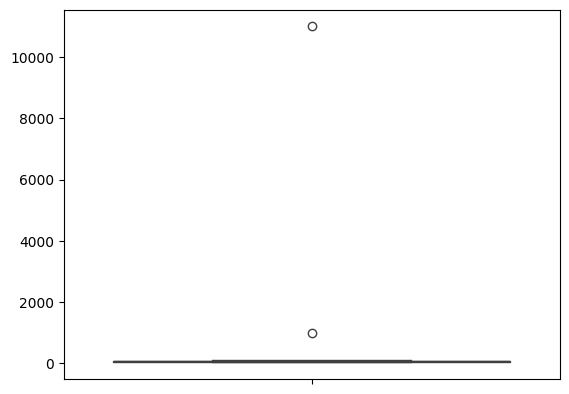

In [182]:
sns.boxplot(list_marks)

In [74]:
lst_marks=[45,32,56,89,54,32,89,90,87,67,54,45,98,99,67,74]

<Axes: >

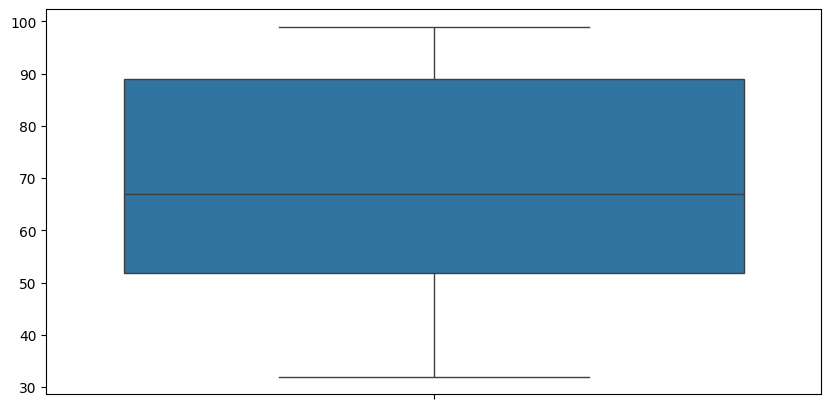

In [80]:
sns.boxplot(lst_marks)

# -------------------------------------------

In [103]:
data= np.random.normal(50, 10,100)
# Introduce outliers
data=np.append(data, [120,130,140])
df = pd.DataFrame(data, columns=['Value'])
df

,Value
0,35.846293
1,45.793547
2,46.572855
3,41.977227
4,48.387143
...,...
98,50.582087
99,38.570297
100,120.000000
101,130.000000


In [149]:
mini,q1,q2,q3,maxi= np.quantile(df['Value'], [0, 0.25,0.50,0.75,1.0])

print(q1, q3)

44.18536890420111 55.279137383496604


In [ ]:
# we can also try this

Q1 = df["Value"].quantile(0.25)
Q3 = df["Value"].quantile(0.75)

In [152]:
IQR = q3-q1
IQR

np.float64(11.093768479295491)

In [153]:
lf= q1- 1.5 *IQR

hf=q3+1.5* IQR

lf, hf

(np.float64(27.544716185257876), np.float64(71.91979010243983))

In [154]:
df_outliers_iqr = df[(df["Value"] < lf ) | (df["Value"] > hf)]

print("Outliers detected using IQR:\n", df_outliers_iqr)

Outliers detected using IQR:
           Value
74    23.802549
100  120.000000
101  130.000000
102  140.000000


In [177]:
# use for loop
non_outliers = []
outliers=[]

for  i in df['Value']:
    if i >=lf and i<=hf:  # lf <= i <= hf:
        non_outliers.append(( i))
        print(f'{len(non_outliers)} : This element is not an outliers: {i}')

    else: outliers.append(i) 
print(f"\nTotal Outliers: {len(outliers)}")
print(f"Total Non-Outliers: {len(non_outliers)}")

1 : This element is not an outliers: 54.96714153011233
2 : This element is not an outliers: 48.61735698828815
3 : This element is not an outliers: 56.47688538100692
4 : This element is not an outliers: 65.23029856408026
5 : This element is not an outliers: 47.658466252766644
6 : This element is not an outliers: 47.6586304305082
7 : This element is not an outliers: 65.79212815507391
8 : This element is not an outliers: 57.67434729152909
9 : This element is not an outliers: 45.30525614065048
10 : This element is not an outliers: 55.42560043585965
11 : This element is not an outliers: 45.365823071875376
12 : This element is not an outliers: 45.34270246429743
13 : This element is not an outliers: 52.41962271566034
14 : This element is not an outliers: 30.86719755342202
15 : This element is not an outliers: 32.75082167486967
16 : This element is not an outliers: 44.37712470759027
17 : This element is not an outliers: 39.87168879665576
18 : This element is not an outliers: 53.142473325952736

<Axes: >

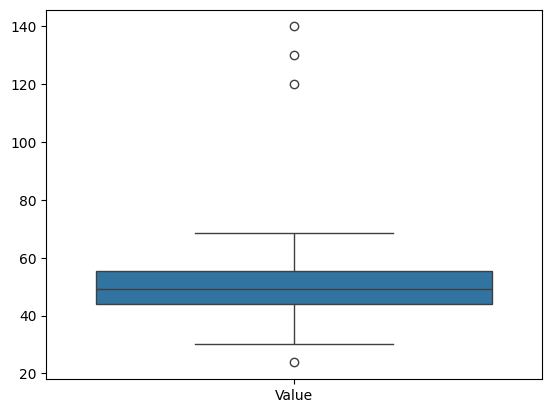

In [178]:
sns.boxplot(df)